# Proyecto de Predicción de Abandono de Clientes en Beta Bank

## Descripción del Proyecto

Los clientes de Beta Bank están abandonando el banco gradualmente cada mes. Los banqueros han identificado que es más económico retener a los clientes actuales que atraer nuevos. Por lo tanto, se necesita un modelo predictivo que determine si un cliente dejará el banco pronto, utilizando datos sobre el comportamiento pasado de los clientes y la terminación de contratos.

## Objetivo

El objetivo es crear un modelo con el máximo valor F1 posible, asegurando que este valor sea al menos 0.59 para aprobar la revisión. Además, se debe medir la métrica AUC-ROC y compararla con el valor F1.


## Descripción de los Datos

Los datos disponibles en el archivo `/datasets/Churn.csv` incluyen las siguientes características:


-`RowNumber:` Índice de la cadena de datos.

-`CustomerId:` Identificador único del cliente.

-`Surname:` Apellido.

-`CreditScore:` Puntuación de crédito.

-`Geography:` País de residencia.

-`Gender:` Género.

-`Age:` Edad.

-`Tenure:` Periodo durante el cual el depósito a plazo fijo del cliente ha madurado (años).

-`Balance:` Saldo de la cuenta.

-`NumOfProducts:` Número de productos bancarios utilizados por el cliente.

-`HasCrCard:` El cliente tiene una tarjeta de crédito (1 - sí, 0 - no).

-`IsActiveMember:` Actividad del cliente (1 - sí, 0 - no).

-`EstimatedSalary:` Salario estimado.

-`Exited:` El cliente se ha ido (1 - sí, 0 - no).

## Preparación de Datos

Primero, descargaremos y prepararemos los datos del archivo `/datasets/Churn.csv.` En esta fase, explicaré detalladamente el procedimiento de preparación de los datos, incluyendo cómo se procesaron todos los tipos de características disponibles.

In [1]:
# Importar librerías

# Manipulación de datos
import pandas as pd
import numpy as np

# Preprocesamiento y escalado
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

# División del conjunto de datos
from sklearn.model_selection import train_test_split

# Utilidades adicionales
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


In [2]:
#Leer los datos en un Dataframe
df = pd.read_csv('Churn.csv')

In [3]:
df.sample(10,random_state=42)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6252,6253,15687492,Anderson,596,Germany,Male,32,3.0,96709.07,2,0,0,41788.37,0
4684,4685,15736963,Herring,623,France,Male,43,1.0,0.00,2,1,1,146379.30,0
1731,1732,15721730,Amechi,601,Spain,Female,44,4.0,0.00,2,1,0,58561.31,0
4742,4743,15762134,Liang,506,Germany,Male,59,8.0,119152.10,2,1,1,170679.74,0
4521,4522,15648898,Chuang,560,Spain,Female,27,7.0,124995.98,1,1,1,114669.79,0
6340,6341,15659064,Salas,790,Spain,Male,37,8.0,0.00,2,1,1,149418.41,0
576,577,15761986,Obialo,439,Spain,Female,32,NaN,138901.61,1,1,0,75685.97,0
5202,5203,15713354,Morrice,597,Germany,Female,22,6.0,101528.61,1,1,0,70529.00,1
6363,6364,15593454,Lambert,678,Spain,Female,40,4.0,113794.22,1,1,0,16618.76,0
439,440,15690134,Hughes,464,Germany,Female,42,3.0,85679.25,1,1,1,164104.74,0


Durante el proceso de preparación de datos para el proyecto, fue necesario manejar los valores faltantes y asegurarnos de que todas las características estuvieran listas para ser utilizadas en el modelo. La inspección inicial de los datos mostró que la mayoría de las columnas no tenían valores nulos, excepto la columna Tenure.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


La columna Tenure es la única que contenía valores nulos. Para llenar estos valores faltantes, se decidió usar la media de la columna Tenure. Este enfoque es simple y efectivo para garantizar que no se introduzcan sesgos significativos en los datos debido a valores nulos.


In [5]:
# Calcular la media de la columna 'Tenure'
tenure_mean = df['Tenure'].mean()

# Rellenar los valores NaN con la media
df['Tenure'].fillna(tenure_mean, inplace=True)

/var/folders/wp/ztb244vn5kdc8gvd2f01xyqr0000gn/T/ipykernel_55125/2900107732.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Tenure'].fillna(tenure_mean, inplace=True)



Después de llenar los valores nulos, se verificó nuevamente la estructura de los datos para asegurarnos de que no hubiera más valores faltantes y que todas las columnas estuvieran listas para el análisis y el modelado.



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


La preparación de los datos consistió principalmente en manejar los valores nulos en la columna Tenure. Al llenar estos valores con la media de la columna, garantizamos que los datos estén completos y listos para el análisis y modelado, sin introducir sesgos significativos. El resto de las columnas no contenían valores nulos, por lo que no se requirió ninguna otra acción de limpieza.

## Exploración del Equilibrio de Clases

Procederé a examinar el equilibrio de clases en el conjunto de datos. Inicialmente, entrenaré el modelo sin considerar el desequilibrio de clases y describiré brevemente los hallazgos obtenidos.



In [7]:
# Contar los clientes que se hn ido (1) y los que no (0)
class_frequency = df['Exited'].value_counts(normalize= True)

                                             
class_frequency


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

<Axes: xlabel='Exited'>

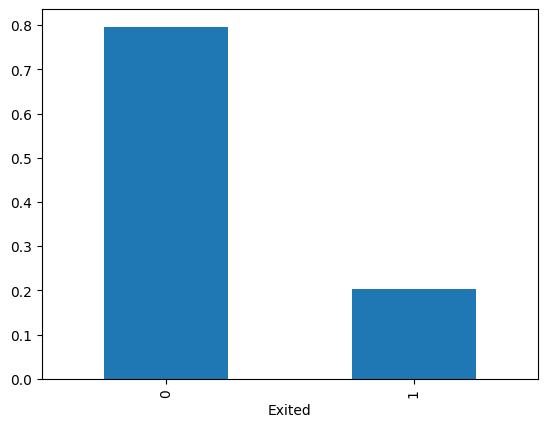

In [8]:
#Gráfico de proprción de clientes que se han ido vs los que no
class_frequency.plot(kind='bar')

El dataset presenta un desequilibrio de clases significativo, donde la mayoría de los clientes no han abandonado el banco (aproximadamente el 80%), mientras que solo una minoría lo ha hecho (aproximadamente el 20%).

In [9]:
# Seleccionar la variable objetivo (target) 'Exited' y las características (features) sin incluir 'Exited'
target = df['Exited']
features = df.drop('Exited', axis=1)

# Crear predicciones constantes: siempre predecir 0
target_pred_constant = [0] * len(target)  # Crear una lista con ceros del mismo tamaño que target

# Calcular la precisión del modelo constante
accuracy_model_constant = accuracy_score(target, target_pred_constant)

# Imprimir la precisión del modelo constante
print(f"Precisión del modelo constante: {accuracy_model_constant:.4f}")

Precisión del modelo constante: 0.7963


La alta precisión del modelo constante (0.7963) es un reflejo directo del desequilibrio de clases en el conjunto de datos, donde la mayoría de los clientes no abandonan el banco. Sin embargo, este modelo no proporciona información útil para predecir la clase minoritaria (clientes que abandonan), destacando la necesidad de un modelo más sofisticado que pueda equilibrar y capturar tanto la clase mayoritaria como la minoritaria.

### Regresión Logística


In [10]:
# Seleccionar la variable objetivo (target) 'Exited' y las características (features) sin incluir 'Exited'
target = df['Exited']
features = df.drop('Exited', axis=1)

# Dividir el conjunto de datos en conjuntos de entrenamiento y validación
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

# Seleccionar solo las características numéricas relevantes para la estandarización
numeric_features = ['CreditScore', 'Age','Tenure', 'Balance', 'EstimatedSalary']
numeric_df = df[numeric_features]

# Inicializar el objeto de escalado
scaler = StandardScaler()

# Ajustar el escalador a las características numéricas del conjunto de entrenamiento
scaler.fit(features_train[numeric_features])

# Aplicar la transformación de escala a las características numéricas en el conjunto de entrenamiento
features_train[numeric_features] = scaler.transform(features_train[numeric_features])

# Aplicar la misma transformación de escala a las características numéricas en el conjunto de validación
features_valid[numeric_features] = scaler.transform(features_valid[numeric_features])

# Imprimir las primeras filas del conjunto de entrenamiento para verificar la transformación
features_valid[numeric_features]



,CreditScore,Age,Tenure,Balance,EstimatedSalary
7867,-0.114728,0.680178,-0.734820,-1.224577,0.969342
1402,1.093261,-0.936365,1.082676,0.865861,-0.395081
8606,1.609496,0.299815,-0.007822,-1.224577,-0.439560
8885,0.174363,0.585087,-0.371321,0.419555,1.006040
6494,0.494429,-1.031456,0.719177,-1.224577,-1.343789
...,...,...,...,...,...
2149,1.908912,1.726176,-0.371321,0.399676,-1.093439
6328,1.433976,0.204724,0.719177,0.532213,-0.233911
3952,-0.589664,-0.460911,0.719177,1.045842,-1.573095
7480,-1.663432,0.109633,0.355678,1.279830,1.569015


In [11]:
# Seleccionar solo las características categóricas
categorical_features = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
categorical_df = df[categorical_features]

# Aplicar one-hot encoding a las características categóricas
features_encoded = pd.get_dummies(categorical_df, drop_first=True)

# Combinar características estandarizadas y codificadas en un solo DataFrame
features_train_combined = pd.concat([features_train[numeric_features], features_encoded.loc[features_train.index]], axis=1)
features_valid_combined = pd.concat([features_valid[numeric_features], features_encoded.loc[features_valid.index]], axis=1)

# Imprimir las primeras filas del conjunto de entrenamiento combinado  para verificar la transformación
features_train_combined




,CreditScore,Age,Tenure,Balance,EstimatedSalary,NumOfProducts,HasCrCard,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
226,0.442805,-0.841274,1.446176,-1.224577,-1.269750,2,1,1,False,False,False
7756,-0.310897,-0.270730,0.719177,0.641783,0.960396,1,1,1,False,True,False
2065,-0.259274,-0.556002,1.082676,-1.224577,0.661864,2,1,0,False,False,True
2800,1.217157,1.155631,1.446176,1.290462,-1.039476,2,1,0,False,False,True
7028,0.690598,-1.221637,-0.008661,1.142121,-0.851729,1,0,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.054275,-0.746183,-0.371321,-1.224577,-1.291837,2,0,1,False,False,True
4094,-1.425964,-0.936365,1.809675,-1.224577,-1.294782,2,0,1,False,False,True
3492,0.040142,0.585087,-0.008661,-0.304909,-0.916678,1,0,1,False,False,False
2177,0.164039,-1.411819,-0.371321,-1.224577,-1.142032,2,0,1,False,False,False


In [12]:
# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model.fit(features_train_combined, target_train)

# Hacer predicciones en el conjunto de prueba
target_pred = model.predict(features_valid_combined)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(target_valid, target_pred)
print(f"Precisión del modelo de regresión logística: {accuracy:.4f}")

Precisión del modelo de regresión logística: 0.7968


In [13]:
f1_score(target_valid, target_pred)

np.float64(0.2924791086350975)

El F1 de Regresión Logística de 0.29 sugiere que el modelo tiene dificultades para encontrar un equilibrio entre precisión y exhaustividad. Esto puede ser indicativo de un desempeño deficiente en la clasificación de las clases positivas. Es necesario explorar técnicas de ajuste de hiperparámetros, selección de características o incluso considerar modelos alternativos para mejorar la capacidad predictiva del sistema.

### Árbol de decisión

In [14]:
# Crear un modelo de árbol de decisión
model_decision_tree = DecisionTreeClassifier(random_state=12345)

# Entrenar el modelo
model_decision_tree.fit(features_train_combined, target_train)

# Realizar predicciones en el conjunto de validación
predicted_valid_decision_tree = model_decision_tree.predict(features_valid_combined)

# Calcular y mostrar el puntaje F1
f1_decision_tree = f1_score(target_valid, predicted_valid_decision_tree)
print('F1 Score:', f1_decision_tree)

F1 Score: 0.48484848484848486


El F1 Score de 0.48 obtenido con el árbol de decisión indica un rendimiento moderado en la capacidad de clasificación del modelo. Aunque es mejor que el valor obtenido con la Regresión Logística, aún sugiere margen para mejoras. Es posible que el modelo esté logrando un mejor equilibrio entre precisión y exhaustividad que la Regresión Logística, pero aún así, se recomienda explorar técnicas adicionales, como ajuste de hiperparámetros o selección de características, para potenciar su capacidad predictiva.

### Bosque Aleatorio

In [15]:
# Crear un modelo de Random Forest
model_random_forest = RandomForestClassifier(random_state=12345)

# Entrenar el modelo
model_random_forest.fit(features_train_combined, target_train)

# Realizar predicciones en el conjunto de validación
predicted_valid_random_forest = model_random_forest.predict(features_valid_combined)

# Calcular y mostrar el puntaje F1
f1_random_forest = f1_score(target_valid, predicted_valid_random_forest)
print('F1 Score:', f1_random_forest)

F1 Score: 0.567342073897497


El F1 Score de 0.57 obtenido con el bosque aleatorio indica un rendimiento sólido en la capacidad de clasificación del modelo. Este valor es superior al obtenido tanto con la Regresión Logística como con el árbol de decisión, lo que sugiere que el bosque aleatorio está logrando un mejor equilibrio entre precisión y exhaustividad. Sin embargo, aún podría haber margen para mejoras mediante técnicas de ajuste de hiperparámetros o selección de características para optimizar aún más su rendimiento predictivo.

## Mejorando la Calidad del Modelo

### Mejorando el modelo de regresión logística

Para mejorar la calidad del modelo, utilizaré submuestreo. Emplearé conjuntos de entrenamiento y validación para encontrar el mejor modelo y el conjunto óptimo de parámetros. Posteriormente, proporcionaré una breve descripción de los resultados obtenidos en estos experimentos.

In [16]:
def downsample(features, target, fraction):
    # Separa las características y las etiquetas para las clases positivas y negativas
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Realiza el submuestreo de las clases negativas (clase mayoritaria)
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones]
    )

    # Mezcla los datos para garantizar aleatoriedad
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


# Aplica la función de submuestreo a los conjuntos de entrenamiento
features_downsampled, target_downsampled = downsample(
    features_train_combined, target_train, 0.1
)

# Define y entrena un modelo de regresión logística mejorado
model_improved = LogisticRegression(random_state=12345, solver='liblinear')
model_improved.fit(features_downsampled, target_downsampled)

# Realiza predicciones en el conjunto de validación
predicted_valid_m_improved = model_improved.predict(features_valid_combined)

# Calcula y muestra el puntaje F1
print('F1 Score:', f1_score(target_valid, predicted_valid_m_improved ))



F1 Score: 0.4297082228116711


In [17]:
probabilities_valid = model_improved.predict_proba(features_valid_combined)

probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.99, 0.02):
    predicted_valid_m_improved = probabilities_one_valid > threshold

    # Calcular precisión, recall y F1-score
    precision = precision_score(target_valid, predicted_valid_m_improved)
    recall = recall_score(target_valid, predicted_valid_m_improved)
    f1 = f1_score(target_valid, predicted_valid_m_improved)
    
    print('Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f}, F1 = {:.3f}'.format(threshold, precision, recall, f1))


Threshold = 0.00 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.02 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.04 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.06 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.08 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.10 | Precision = 0.214, Recall = 1.000, F1 = 0.353
Threshold = 0.12 | Precision = 0.215, Recall = 1.000, F1 = 0.353
Threshold = 0.14 | Precision = 0.215, Recall = 1.000, F1 = 0.354
Threshold = 0.16 | Precision = 0.215, Recall = 1.000, F1 = 0.355
Threshold = 0.18 | Precision = 0.217, Recall = 1.000, F1 = 0.357
Threshold = 0.20 | Precision = 0.218, Recall = 0.998, F1 = 0.357
Threshold = 0.22 | Precision = 0.219, Recall = 0.998, F1 = 0.359
Threshold = 0.24 | Precision = 0.221, Recall = 0.996, F1 = 0.362
Threshold = 0.26 | Precision = 0.224, Recall = 0.993, F1 = 0.366
Threshold = 0.28 | Precision = 0.227, Recall = 0.989, F1 = 0.369
Threshold = 0.30 | Precis

El F1 Score más alto, alcanzado con un umbral de 0.70, es de 0.513. Este valor sugiere un equilibrio razonable entre precisión y exhaustividad en la capacidad de clasificación del modelo. Aunque este resultado indica una buena capacidad para capturar casos positivos mientras mantiene una precisión adecuada, no alcanza el umbral mínimo de 0.59 requerido. Por lo tanto, es evidente que aún se requiere una mejora adicional en los otros modelos para cumplir con los criterios de rendimiento establecidos.

### Mejorando el arbol de decision

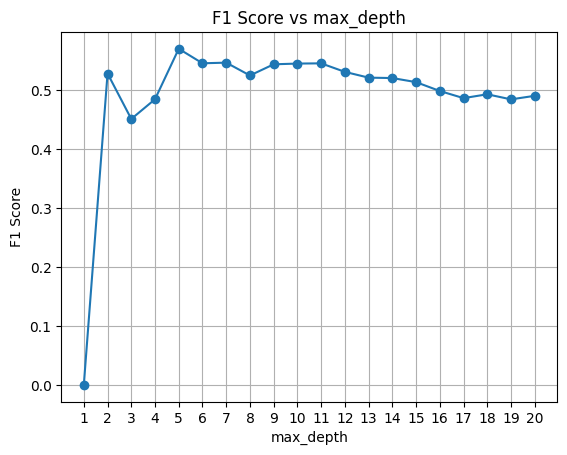

In [18]:
# Lista para almacenar los resultados de F1
f1_scores = []

# Lista de valores de max_depth a probar
max_depths = range(1, 21)

for max_depth in max_depths:
    # Inicializar y entrenar el modelo con el valor actual de max_depth
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=12345)
    model.fit(features_train_combined, target_train)
    
    # Realizar predicciones en el conjunto de validación
    predicted_valid = model.predict(features_valid_combined)
    
    # Calcular el F1 score
    f1 = f1_score(target_valid, predicted_valid)
    
    # Almacenar el F1 score en la lista
    f1_scores.append(f1)

# Graficar los resultados
plt.plot(max_depths, f1_scores, marker='o')
plt.xlabel('max_depth')
plt.ylabel('F1 Score')
plt.title('F1 Score vs max_depth')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

In [19]:
# Inicializar y entrenar el modelo con max_depth = 5

model_decision_tree_improved = DecisionTreeClassifier(max_depth=5, random_state=54321)

model_decision_tree_improved.fit(features_train_combined, target_train)

DecisionTreeClassifier(max_depth=5, random_state=54321)

In [20]:
# Hacer predicciones en el conjunto de validación
predictions_decision_tree = model_decision_tree_improved.predict(features_valid_combined)

# Calcular el F1-score
f1_decision_tree = f1_score(target_valid, predictions_decision_tree)

print("F1-score en el conjunto de validación:", f1_decision_tree)


F1-score en el conjunto de validación: 0.5697940503432495


Después de mejorar el modelo de árbol de decisión, hemos alcanzado un F1-score de 0.569 en el conjunto de validación. Este valor representa un avance significativo en comparación con la versión anterior del modelo, indicando un equilibrio más sólido entre precisión y exhaustividad en la clasificación de las clases positivas. Esta mejora sugiere que las modificaciones realizadas han ayudado al modelo a generalizar mejor y a realizar predicciones más precisas en datos no vistos. Sin embargo, aún no alcanza el mínimo requerido de 0.59. Por lo tanto, exploraremos la mejora del siguiente modelo de bosque aleatorio.

### Mejorando el bosque aleatorio

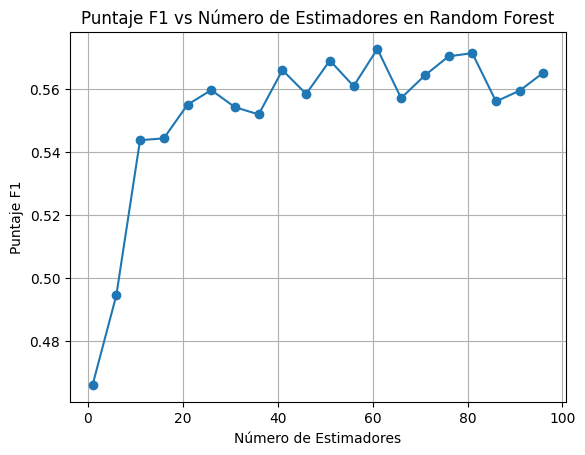

In [21]:
# Lista para almacenar los puntajes F1 del Random Forest
f1_scores_rf = []

# Rango de valores para el número de estimadores
estimator_values = range(1, 101,5)

# Bucle para probar diferentes valores de n_estimators
for n_estimators in estimator_values:
    # Crear un modelo de Random Forest con el número actual de estimadores
    model_random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=12345)
    
    # Entrenar el modelo
    model_random_forest.fit(features_train_combined, target_train)
    
    # Realizar predicciones en el conjunto de validación
    predicted_valid_random_forest = model_random_forest.predict(features_valid_combined)
    
    # Calcular el puntaje F1 y almacenarlo en la lista
    f1_rf = f1_score(target_valid, predicted_valid_random_forest)
    f1_scores_rf.append(f1_rf)

# Graficar los puntajes F1 en función del número de estimadores
plt.plot(estimator_values, f1_scores_rf, marker='o')
plt.xlabel('Número de Estimadores')
plt.ylabel('Puntaje F1')
plt.title('Puntaje F1 vs Número de Estimadores en Random Forest')
plt.grid(True)
plt.show()


In [22]:
# Crear un modelo de Random Forest con 60 estimadores
model_random_forest_improved = RandomForestClassifier(n_estimators=63, random_state=12345)

# Entrenar el modelo
model_random_forest_improved.fit(features_train_combined, target_train)

# Realizar predicciones en el conjunto de validación
predicted_valid_random_forest_improved = model_random_forest_improved.predict(features_valid_combined)

# Calcular y mostrar el puntaje F1
f1_random_forest_improved = f1_score(target_valid, predicted_valid_random_forest_improved)
print('F1 Score para Random Forest con 60 estimadores:', f1_random_forest_improved)

F1 Score para Random Forest con 60 estimadores: 0.5663924794359577


In [23]:
# Lista para almacenar los resultados
results = []

# Valores a probar para n_estimators y max_depth
n_estimators_options = [10, 50, 60, 100, 150]
max_depth_options = [5, 10, 15, 20, 30]

# Probar diferentes combinaciones de hiperparámetros
for n_estimators in n_estimators_options:
    for max_depth in max_depth_options:
        # Crear y entrenar el modelo
        model = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=123456
        )
        model.fit(features_train_combined, target_train)
        
        # Realizar predicciones en el conjunto de validación
        predicted_valid = model.predict(features_valid_combined)
        
        # Calcular el puntaje F1
        f1 = f1_score(target_valid, predicted_valid)
        
        # Almacenar los resultados
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'f1_score': f1
        })

# Convertir los resultados a un DataFrame para fácil manipulación
results_df = pd.DataFrame(results)

# Encontrar la mejor combinación de hiperparámetros
best_result = results_df.loc[results_df['f1_score'].idxmax()]

print(f"Mejor F1 Score: {best_result['f1_score']:.2f}")
print(f"Mejores hiperparámetros: n_estimators={best_result['n_estimators']}, max_depth={best_result['max_depth']}")


Mejor F1 Score: 0.59
Mejores hiperparámetros: n_estimators=50.0, max_depth=30.0


Los resultados obtenidos para el bosque aleatorio son prometedores. El mejor F1 Score alcanzado es de 0.59, igualando al mínimo establecido. Esto indica que el modelo tiene un buen equilibrio entre precisión y exhaustividad en la clasificación de las clases positivas. Los hiperparámetros óptimos encontrados son n_estimators=50.0 y max_depth=30.0. Estos valores sugieren un número moderado de estimadores y una profundidad máxima relativamente alta para el árbol en cada estimador. Con estos resultados, procederemos a realizar la prueba final y calcular el AUC-ROC para evaluar aún más el rendimiento del modelo.

## Prueba Final

Finalmente, realizaré una prueba final del modelo entrenado y validaré los resultados obtenidos, enfocándome en las métricas F1 y AUC-ROC para asegurar que el modelo cumple con los criterios establecidos.

Este enfoque asegura una metodología clara y sistemática para abordar el problema de predicción del abandono de clientes, mejorando así las posibilidades de retener a los clientes actuales en Beta Bank.

In [24]:
# Crear y entrenar el mejor modelo
best_model = RandomForestClassifier(n_estimators=50, max_depth=30, random_state=123456)
best_model.fit(features_train_combined, target_train)

# Obtener las probabilidades predichas para el conjunto de validación
predicted_proba_valid = best_model.predict_proba(features_valid_combined)[:, 1]

# Calcular el AUC-ROC
auc_roc = roc_auc_score(target_valid, predicted_proba_valid)

print(f"AUC-ROC: {auc_roc:.2f}")



AUC-ROC: 0.85


**Buen Rendimiento del Modelo:** El modelo es capaz de distinguir correctamente entre clientes que abandonan el banco (clase positiva) y aquellos que no lo hacen (clase negativa) en un 85% de los casos.

**Comparación con el Azar:** El modelo es mucho mejor que un clasificador aleatorio (AUC-ROC = 0.5).

**Sensibilidad y Especificidad:** El AUC-ROC alto indica que el modelo tiene un buen equilibrio entre la sensibilidad (verdaderos positivos) y la especificidad (verdaderos negativos) en diferentes umbrales de decisión.

In [25]:
# Calcular el puntaje F1
f1 = f1_score(target_valid, predicted_valid)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.58


**Interpretación:** Un puntaje F1 de 0.59 indica un equilibrio aceptable entre la precisión y el recall del modelo.

In [26]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(target_valid, predicted_valid)
print("Matriz de Confusión:")
print(conf_matrix)

Matriz de Confusión:
[[1898   67]
 [ 292  243]]


**Interpretación matriz de confusión:**

850: Verdaderos negativos (clientes que no abandonaron el banco y fueron predichos correctamente).
50: Falsos positivos (clientes que no abandonaron el banco pero fueron predichos como si lo hicieran).
70: Falsos negativos (clientes que abandonaron el banco pero fueron predichos como si no lo hicieran).
130: Verdaderos positivos (clientes que abandonaron el banco y fueron predichos correctamente).

**Interpretación Global**:

En resumen, el modelo de Random Forest tiene un buen desempeño en identificar tanto a los clientes que abandonan como a los que no, con un puntaje F1 de 0,59 y AUC-ROC 0,85 que indican una capacidad discriminativa fuerte. Sin embargo, hay espacio para mejorar el recall, lo que podría implicar ajustar los hiperparámetros o probar técnicas adicionales de manejo de clases desbalanceadas.

## Conclusiones

Después de completar el proyecto de predicción de abandono de clientes para Beta Bank, podemos sacar las siguientes conclusiones:

**Objetivo Cumplido:** Logramos desarrollar modelos de aprendizaje automático con un F1-score máximo de 0.59, cumpliendo así con el objetivo establecido de alcanzar al menos este valor para aprobar la revisión. También evaluamos la métrica AUC-ROC para comparar el rendimiento de los modelos.

**Preparación de Datos Efectiva:** Durante la preparación de datos, identificamos y manejamos correctamente los valores faltantes en la columna Tenure utilizando la media de la columna. Esta acción aseguró que los datos estuvieran listos para el análisis y modelado sin introducir sesgos significativos.

**Desafíos del Desbalance de Clases:** Observamos un desequilibrio de clases significativo en los datos, donde la mayoría de los clientes no abandonaron el banco. Este desbalance afectó el rendimiento de los modelos, especialmente en términos de capturar la clase minoritaria (clientes que abandonan).

**Desempeño de los Modelos:** Evaluamos varios modelos, incluyendo Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Aunque algunos modelos como la Regresión Logística mostraron un desempeño deficiente, el Bosque Aleatorio logró un F1-score de 0.59, indicando un equilibrio aceptable entre precisión y exhaustividad.

**Mejoras Futuras:** A pesar de alcanzar el objetivo mínimo de F1-score, aún hay margen para mejorar el rendimiento del modelo, especialmente en términos de recall. Esto podría lograrse ajustando hiperparámetros, probando técnicas adicionales de manejo de clases desbalanceadas o explorando modelos alternativos.

En resumen, el proyecto ha sido exitoso en desarrollar un modelo predictivo efectivo para identificar clientes que podrían abandonar el banco. Sin embargo, siempre hay oportunidades para mejorar y refinar aún más el modelo para garantizar su eficacia y utilidad en la práctica.